# Task 3

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

## Read data from S3

In [3]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
#aws_credentials = {"key": "","secret": "","token":""}
#df = pd.read_csv("../data/ml_data_SYD.csv",index_col=0,parse_dates=True)

df = pd.read_csv("s3://mds-s3-group4/output/ml_data_SYD.csv", index_col=0, parse_dates=True)
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


## Drop na and pre-processing

In [4]:
X = df.dropna().drop(columns=['Observed'])
y = df.dropna()['Observed']

## Split Train and Test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36791, 25)
(36791,)
(9198, 25)
(9198,)


## EDA

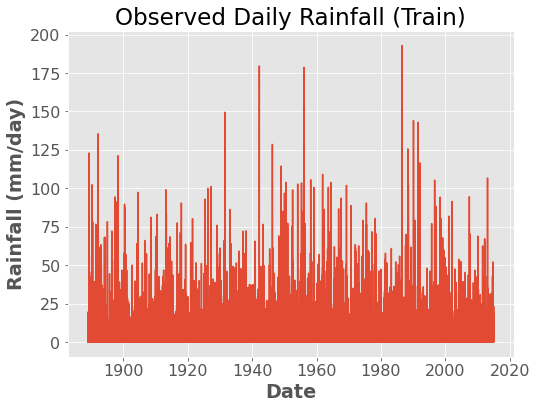

In [6]:
plt.plot(y_train.sort_index())
plt.xlabel("Date")
plt.ylabel("Rainfall (mm/day)")
plt.title("Observed Daily Rainfall (Train)")
plt.show;

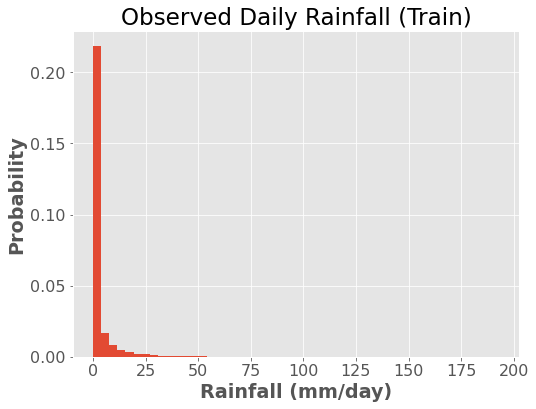

In [7]:
plt.hist(y_train,bins=50,density=True)
plt.xlabel("Rainfall (mm/day)")
plt.ylabel("Probability")
plt.title("Observed Daily Rainfall (Train)")
plt.show;

In [8]:
pd.DataFrame(y_train).groupby(y_train.index.month).agg({'Observed':['min','max','mean','median','std']})

Observed                                           
          min         max      mean    median        std
time                                                    
1         0.0  114.464670  3.211015  0.276813   8.756850
2         0.0  178.642600  3.764161  0.337489  10.218606
3         0.0  179.558040  3.495745  0.327174   9.600654
4         0.0  128.538210  3.097233  0.230103   8.542903
5         0.0  123.008026  2.718992  0.119466   8.645127
6         0.0  142.942600  3.360019  0.139686   9.733359
7         0.0  149.477890  2.320148  0.061757   8.173942
8         0.0  192.933030  2.004762  0.070579   7.507207
9         0.0   88.783035  1.787701  0.091908   5.244642
10        0.0   77.491860  2.099570  0.145572   5.995267
11        0.0  109.086710  2.526110  0.208778   6.603878
12        0.0   65.563910  2.418388  0.203661   5.955717

The daily rainfall is mostly 0 (right skewed) as expected since not everyday it is raining. Over the years there seems to be the highest variance in rainfall during February.

## Train RandomForestRegressor Model

In [9]:
regr = RandomForestRegressor(random_state=123)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [10]:
print(f"Train RMSE: {mean_squared_error(y_train, regr.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, regr.predict(X_test), squared=False):.2f}")

Train RMSE: 3.11
 Test RMSE: 8.86


In [11]:
y_pred = pd.DataFrame(regr.predict(X_train), index=X_train.index)

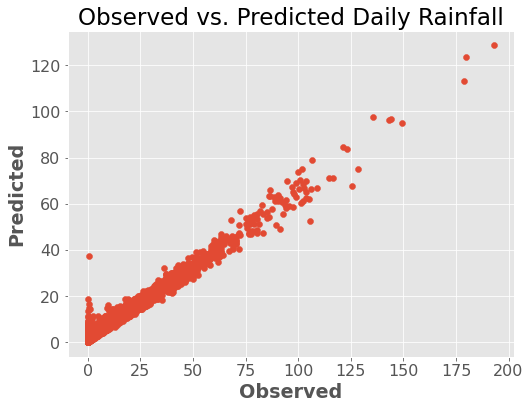

In [12]:
plt.scatter(y_train, y_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs. Predicted Daily Rainfall")
plt.show;

In [13]:
from collections import defaultdict

model_mse = defaultdict(dict)

for i in X_train.columns:
    model_mse[i]['Train'] = mean_squared_error(y_train, X_train[i], squared=False)
    model_mse[i]['Test'] = mean_squared_error(y_test, X_test[i], squared=False)
    model_mse[i]['Total'] = mean_squared_error(y, X[i], squared=False)

model_mse['RFR_not_tuned']['Train'] = mean_squared_error(y_train, regr.predict(X_train), squared=False)
model_mse['RFR_not_tuned']['Test'] = mean_squared_error(y_test, regr.predict(X_test), squared=False)
model_mse['RFR_not_tuned']['Total'] = mean_squared_error(y, regr.predict(X), squared=False)

pd.DataFrame.from_dict(model_mse, orient='index')

,Train,Test,Total
ACCESS-CM2,10.567243,11.038999,10.663266
ACCESS-ESM1-5,10.643536,10.695305,10.653911
AWI-ESM-1-1-LR,10.876956,10.996616,10.900993
BCC-CSM2-MR,10.294775,10.761381,10.389775
BCC-ESM1,10.071200,10.615578,10.182407
CMCC-CM2-HR4,10.353439,10.643204,10.412039
CMCC-CM2-SR5,10.935517,11.480614,11.046691
CMCC-ESM2,10.713240,11.246493,10.821995
CanESM5,10.571301,11.151318,10.689825
EC-Earth3-Veg-LR,9.902149,10.453606,10.014873


## Discussion

The individual climate models have test RMSEs ranging from 9.60 to 12.25 which are higher than the test RMSE of our ensemble model with RMSE of 9.01. Ensemble model definitely perform better than any of the individual models, although the un-tuned model is overfitting as we see the train score (3.12) vs. test score (8.86).

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [14]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=False, random_state=123)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5, random_state=123)

In [15]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.91
 Test RMSE: 8.71


In [16]:
model_mse['RFR_tuned']['Train'] = mean_squared_error(y_train, model.predict(X_train), squared=False)
model_mse['RFR_tuned']['Test'] = mean_squared_error(y_test, model.predict(X_test), squared=False)
model_mse['RFR_tuned']['Total'] = mean_squared_error(y, model.predict(X), squared=False)

pd.DataFrame.from_dict(model_mse, orient='index')

,Train,Test,Total
ACCESS-CM2,10.567243,11.038999,10.663266
ACCESS-ESM1-5,10.643536,10.695305,10.653911
AWI-ESM-1-1-LR,10.876956,10.996616,10.900993
BCC-CSM2-MR,10.294775,10.761381,10.389775
BCC-ESM1,10.071200,10.615578,10.182407
CMCC-CM2-HR4,10.353439,10.643204,10.412039
CMCC-CM2-SR5,10.935517,11.480614,11.046691
CMCC-ESM2,10.713240,11.246493,10.821995
CanESM5,10.571301,11.151318,10.689825
EC-Earth3-Veg-LR,9.902149,10.453606,10.014873


## Discussion

After performing hyperparameter tuning on the ensemble model, we get better test RMSE compared the untuned model (8.86 vs. 8.71). We also see that the model is not overfitting as much the untuned model with a train RMSE of 7.91 and a test RMSE of 8.71.

In [17]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***